In [3]:
import matplotlib
from matplotlib import pyplot as plt
import os
import numpy as np
import glob

In [4]:
# Set figure parameters
WIDTH = 1.5 * 8.3 / 2.54
DOUBLE_WIDTH = 1.5 * 17.1 / 2.54
DPI = 350
format='png'
matplotlib.rcParams.update(
    {
        'axes.labelsize': 14,
        'axes.xmargin': 0,
        'axes.ymargin': .1,
        'lines.markersize': 3,
        'figure.dpi': DPI,
        'figure.autolayout': True,
        'figure.figsize': (WIDTH, 3 * WIDTH / 4),
        'figure.facecolor': 'white',
        'font.size': 12,
        'grid.color': '0',
        'grid.linestyle': '-',
        'legend.edgecolor': '1',
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'font.family': "DeJavu Serif",
        'font.serif': ["Computer Modern Roman"],
        'mathtext.fontset': 'cm',
        'mathtext.rm': 'serif',
        'text.usetex': False
    }
)

Text(0, 0.5, '$M$')

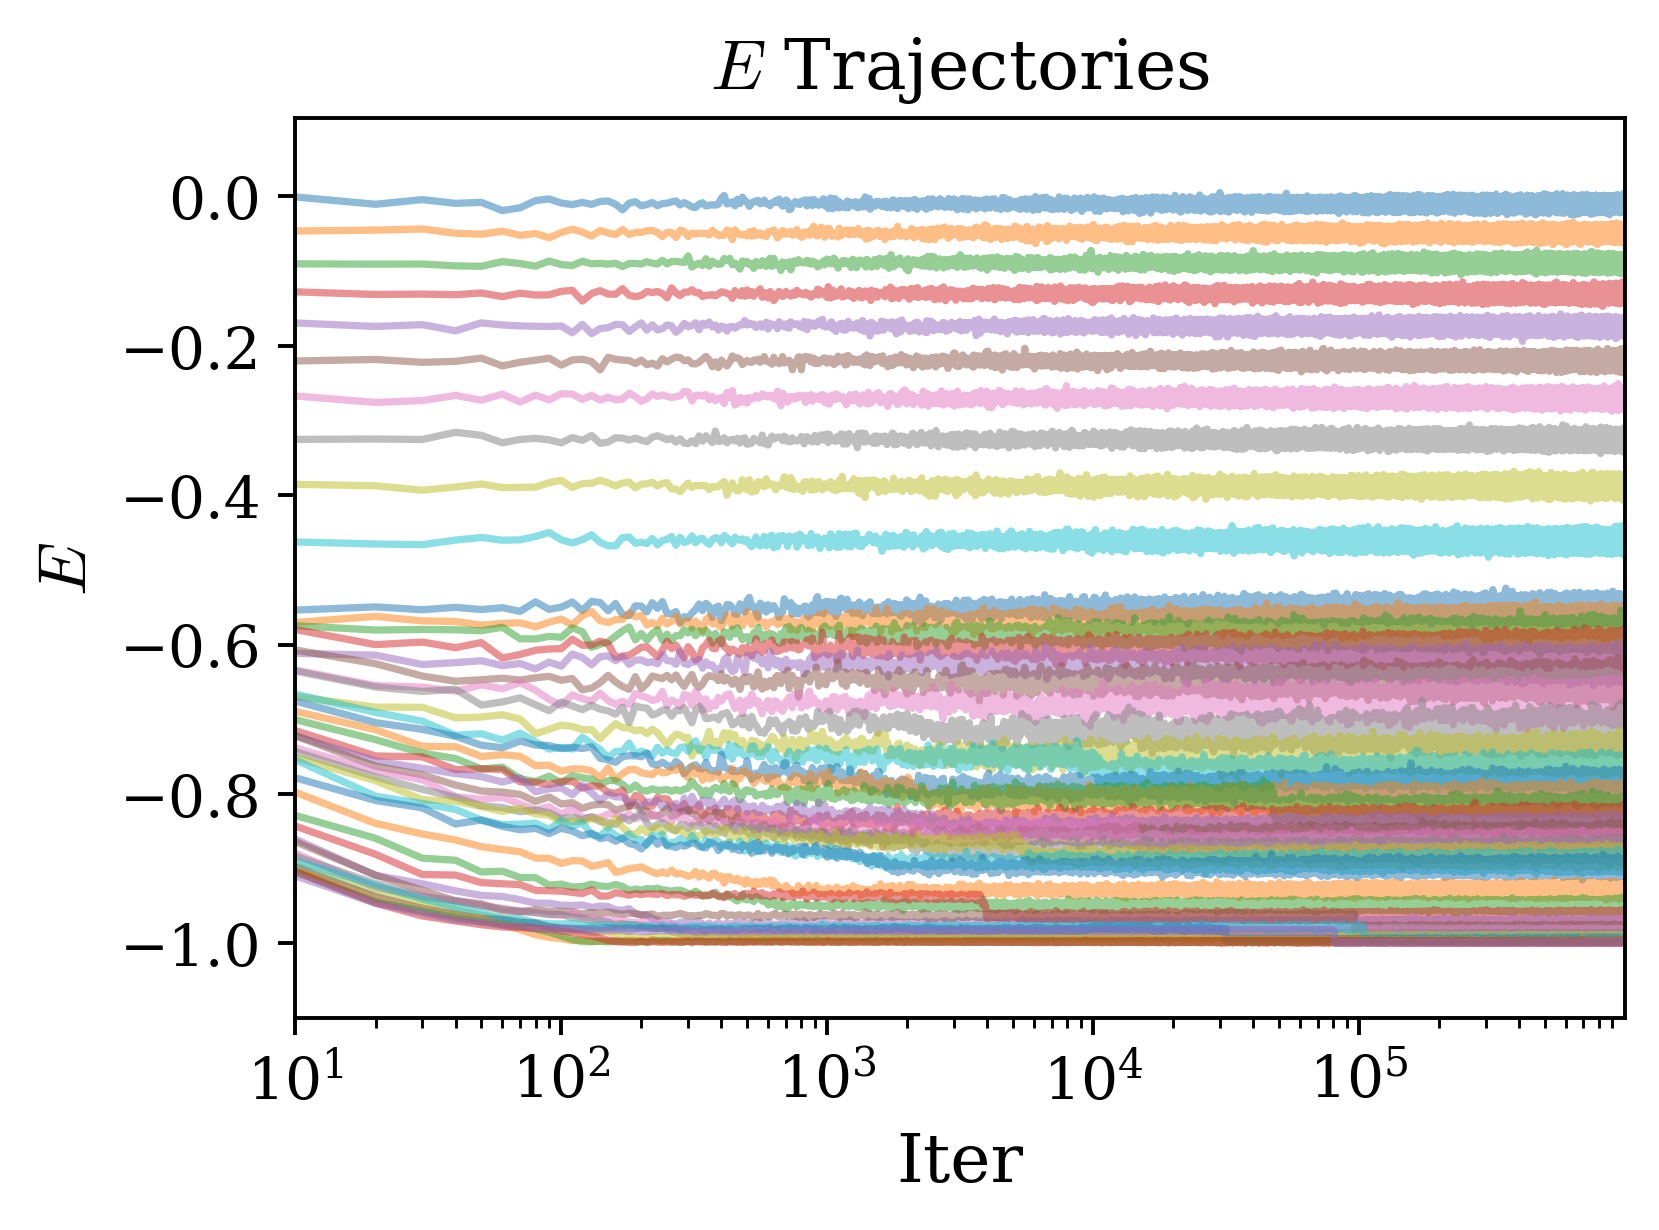

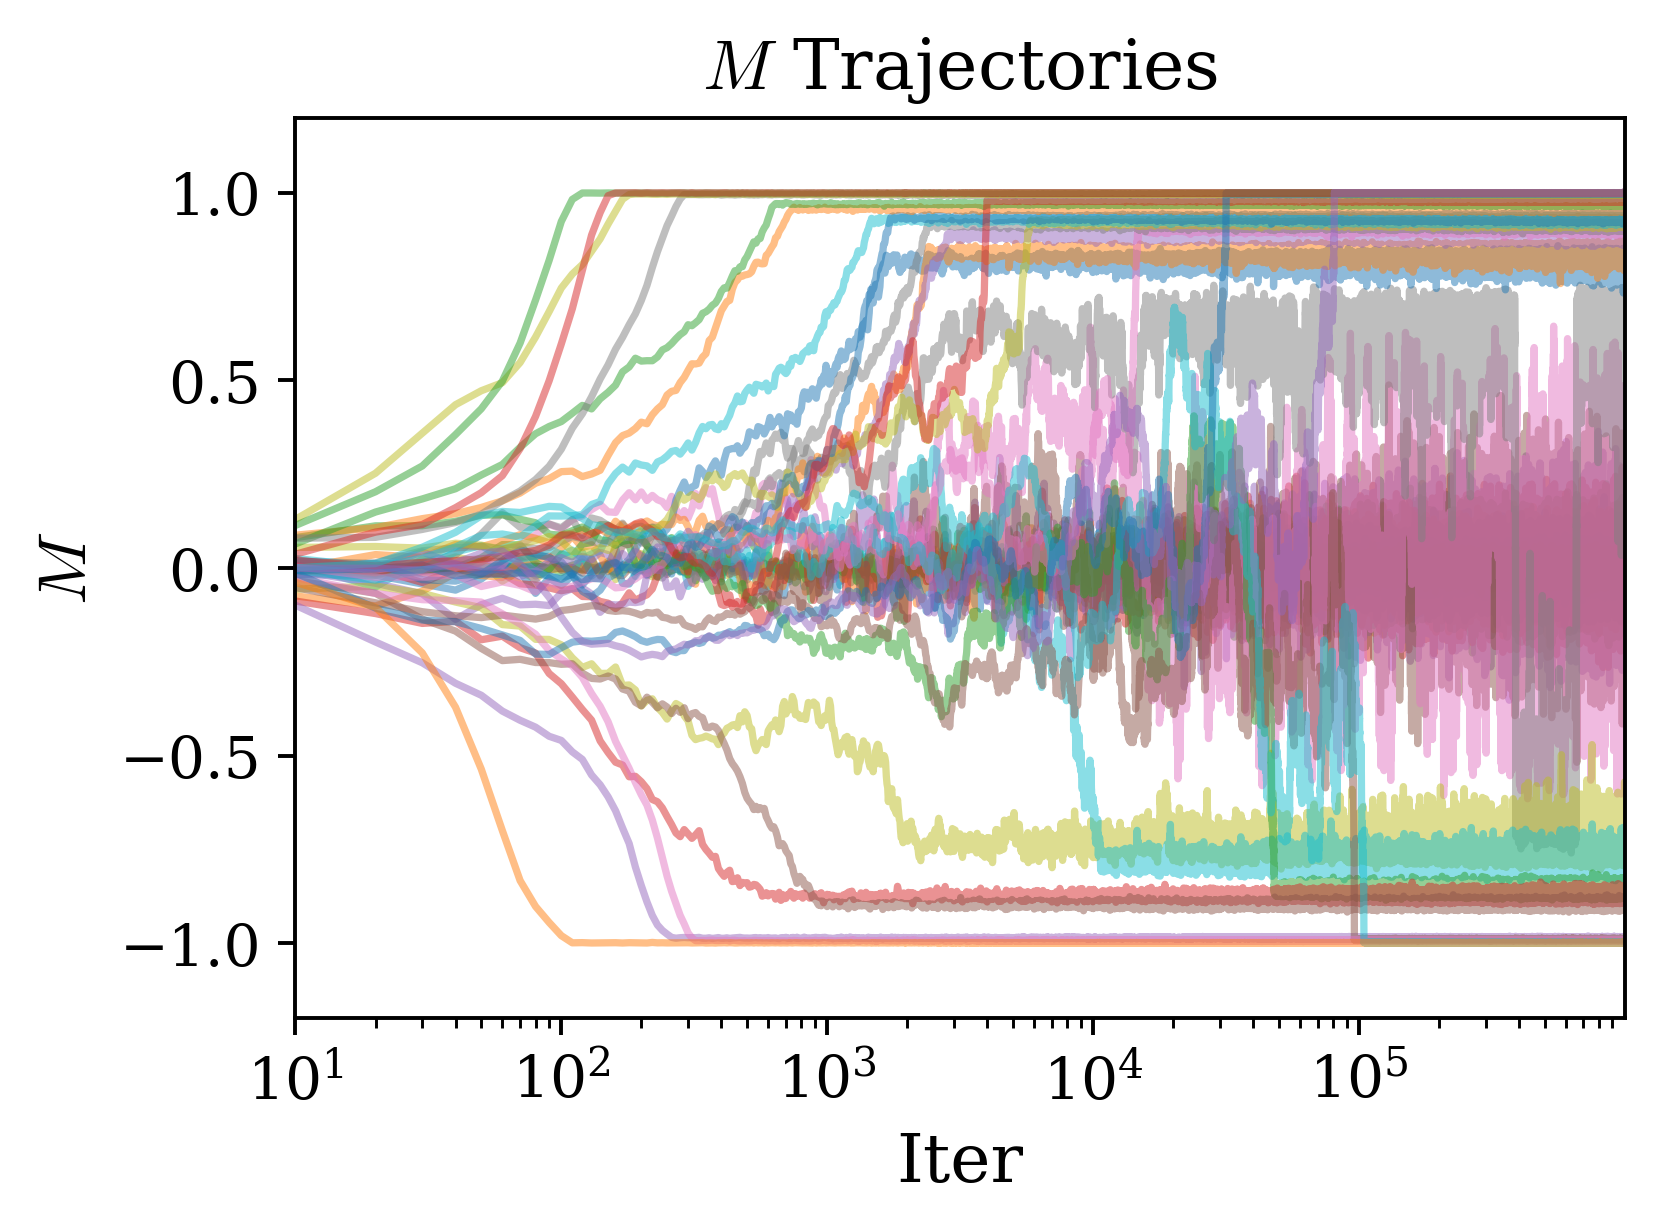

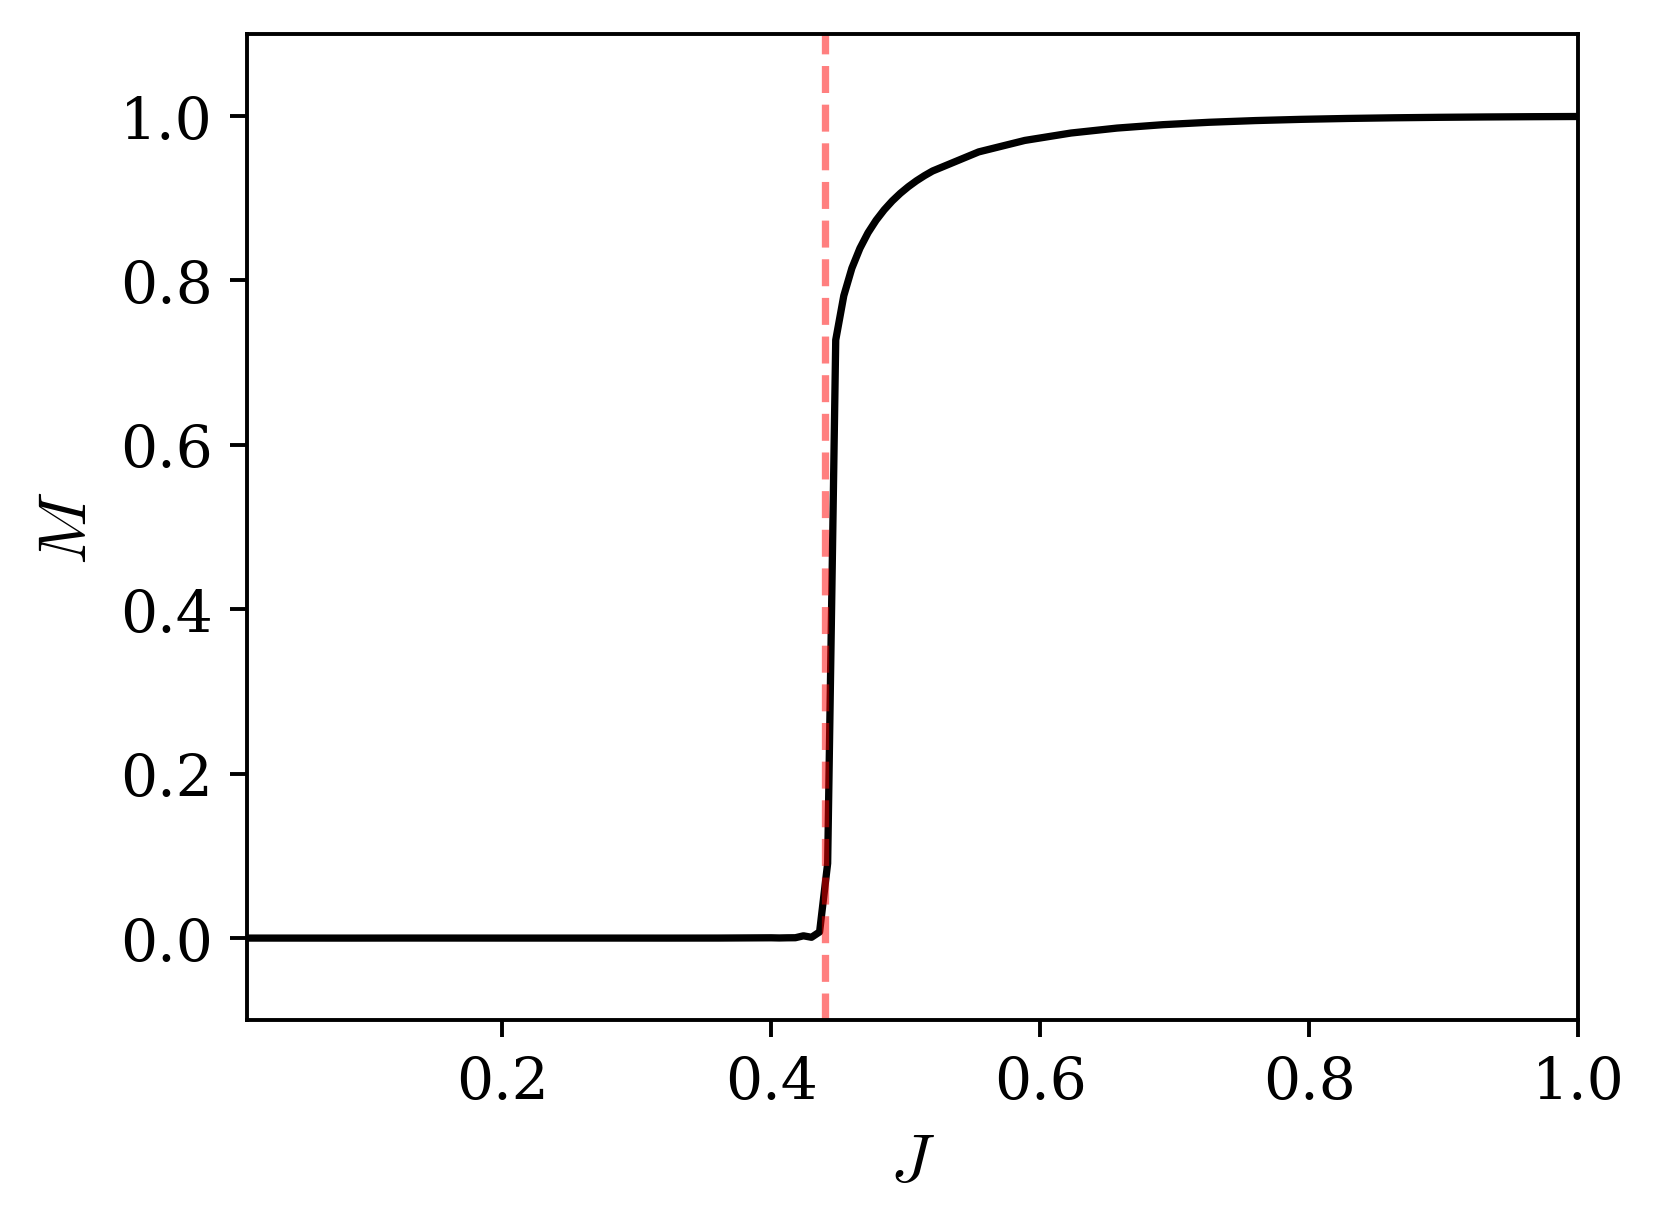

In [26]:
root = "../output/"

files = []
Js = []

for file in glob.glob(root+"*.dat"):
    Js += [round(float(file.split("_")[-1][:-4]),4)]
    files += [file]

zipped_lists = zip(Js, files)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
Js, files = [ list(tuple) for tuple in  tuples]

plt.figure(1,tight_layout=True)
plt.figure(2,tight_layout=True)

Ms_avg = []

for J,file in zip(Js,files):
    iters = []
    Es = []
    Ms = []
    with open(file,'rb') as f:
        for line in f:
            iters += [int(line.split()[0])]
            Es += [float(line.split()[1])]
            Ms += [float(line.split()[2])]
    
    N = int(6e4)
    n = int(1e3)
    Ms_avg += [np.abs(np.mean(np.mean(np.array(Ms[-N:]).reshape((n,int(N/n))),axis=1)))]
    
    plt.figure(1)
    p, = plt.semilogx(iters,Es,'-',alpha=0.5,label=f"{J:.4f}")
    plt.figure(2)
    plt.semilogx(iters,Ms,'-',alpha=0.5,color=p.get_color(),label=f"{J:.4f}")

plt.figure(1)
plt.xlabel("Iter")
plt.ylabel(r"$E$")
plt.title(r"$E$ Trajectories")
# plt.legend(bbox_to_anchor=(1.01,1),loc="upper left")

plt.figure(2)
plt.xlabel("Iter")
plt.ylabel(r"$M$")
plt.title(r"$M$ Trajectories")

plt.figure(3)
plt.plot(Js,Ms_avg,"-k",markersize=3)
plt.axvline(x=0.44,linestyle='--',color='r',alpha=0.5)
plt.xlabel(r"$J$")
plt.ylabel(r"$M$")